# Нейронные сети. Введение

## Линейная модель нейрона МакКаллока-Питтса

Мы переходим к изучению нейросетевых методов машинного обучения. Мы уже изучили линейные модели классификации и регрессии. Нейронные сети есть не что иное, как композиции таких методов. Всё началось в $43$-м году, когда американские учёные Мак-Каллок и Питтс предложили линейную модель нейрона. Вообще, нейрофизиологов давно интересовало, на каких принципах основана работа нервной клетки нейрона, и как можно эти принципы смоделировать, чтобы дальше потом это использовать для создания искусственного интеллекта.

Самая простая модель нервной клетки — это и есть, по сути, линейный классификатор. Почему так происходит? Дело в том, что нервную клетку, нейрон можно рассматривать как устройство, которое на входе имеет много так называемых дендритов, это такие места, отростки на нервной клетке, которые обладают свойством, что если вокруг них происходит концентрация отрицательных ионов, то эти ионы переходят внутрь клетки, и они там накапливаются внутри клетки. Если суммарный заряд, накопившийся внутри клетки, превосходит некоторый порог активации, клетка приходит в возбуждённое состояние и генерирует электрический импульс, который распространяется по длинному отростку, который называется аксоном, и там, на конце аксона, происходит взаимодействие со следующей нервной клеткой. Там происходит очередное накопление отрицательных ионов, они проходят в следующую клетку и так далее. Число дендритов может у клетки быть порядка тысячи — десятки тысяч, а число всего нервных клеток в нервной системе человека порядка сотен миллиардов. 

И, оказывается, что вот такая система из нейронов способна решать очень сложные задачи. Что из себя представляет сам нейрон? Поскольку заряды — это величины, как известно из физики, аддитивные, то он и получается, что реализует этакий линейный классификатор. И если мы в качестве признаков будем рассматривать количество зарядов на дендритах, а в качестве весов этих признаков будем рассматривать способность этих дендритов или как говорят, синоптических связей там находящихся, пропускать отрицательные ионы внутрь клетки, то получается, что суммарный заряд накопленный есть не что иное, как линейная комбинация зарядов, которые были на входе, то есть, по сути, это признаки в линейном классификаторе, и они умножаются на веса. 

Потом вся эта линейная комбинация сравнивается с некоторым числом, порогом активации, который мы обозначаем $w_0$. И ещё принято рассматривать функцию активации, это та функция, которая преобразует суммарный накопленный заряд в какой-то выход на аксоне этой клетки. Можно думать, что это просто пороговая функция, то есть функция, принимающая значение $0,\ 1$, а можно использовать её какие-то непрерывные аппроксимации, потому что, конечно же, ничего такого порогового и разрывного в природе не бывает. 

И здесь изображены две схемы. Первая слева схема показывает вот в таком вот инженерном представлении нервную клетку, как некий автомат, который имеет входы и выходы и осуществляет просто сложение входных значений с весами, а потом преобразование с помощью нелинейной функции активации. И вот этот вот сложный рисунок, который взят из Википедии, он показывает как вообще устроена нервная клетка, ну и видно, что, конечно, наша модель, она очень сильно упрощённая. Существует огромное количество, десятки различных разновидностей нервных клеток, которые выполняют самые разные функции в нервной системе. Вот ну такая вот простейшая модель, она всё-таки действительно позволяет имитировать простые функции интеллекта, в частности, способность обучаться по прецеденту. 

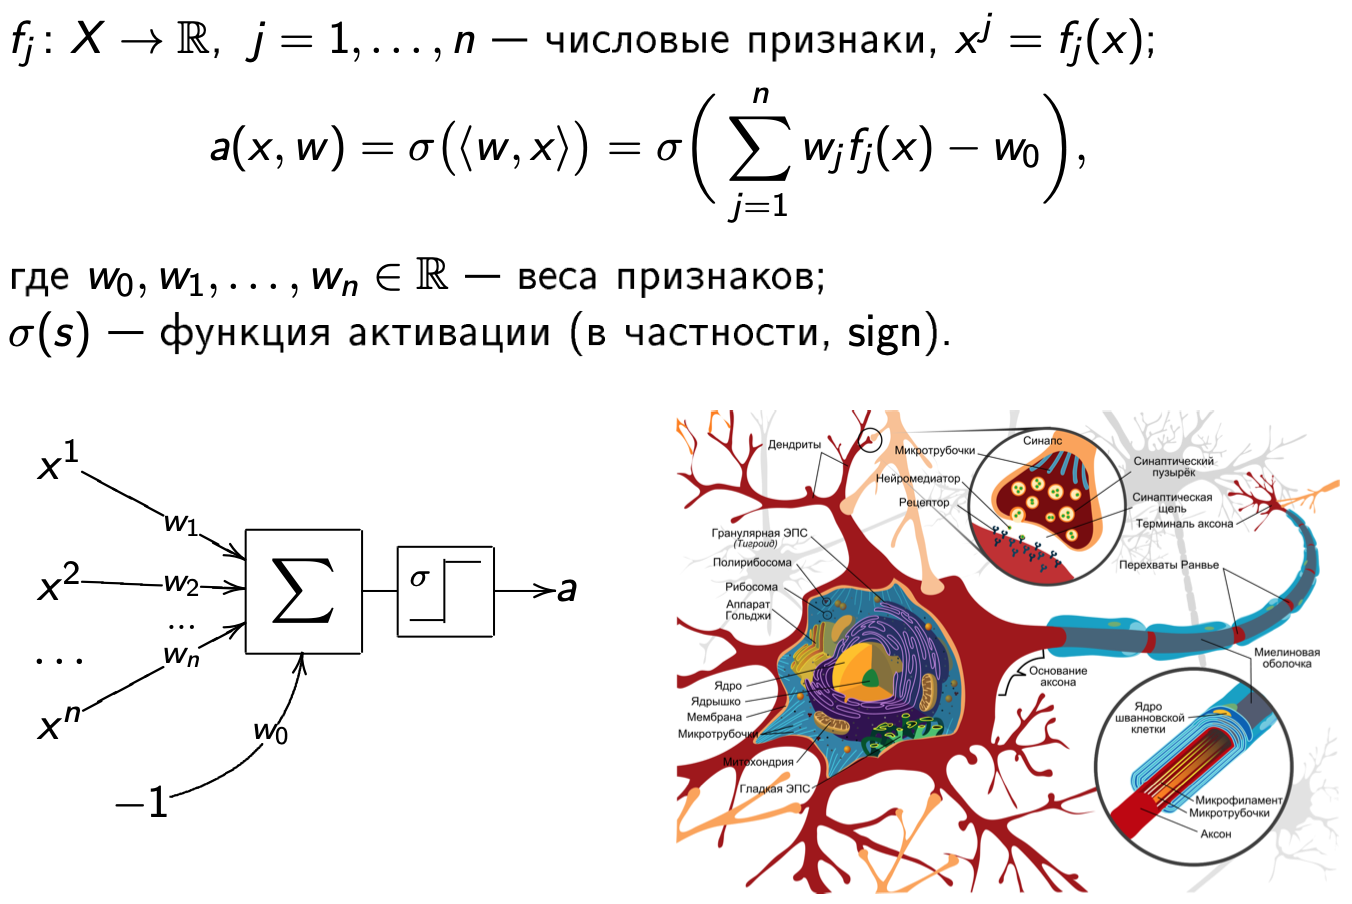

In [1]:
from IPython.display import Image
Image(filename='images/5.2 Нейронные сети/image_1.png')

## Часто используемые функции активации $\sigma(z)$

Здесь представлены те разновидности функции активации, которая используется в практических задачах. Крайне редко используется линейная функция активации, понятно, что она соответствует просто обычной линейной модели регрессии, которую мы рассматривали ранее. Пороговая функция активации — это просто линейный классификатор. 

Всякого рода другие функции, например, сигмоидная функция, они позволяют получить на выходе нейрона такую вот мягкую классификацию, не жёстко $0,1$, а какие-то промежуточные значения, которые иногда можно трактовать как оценку вероятности класса при данном объекте $x$.

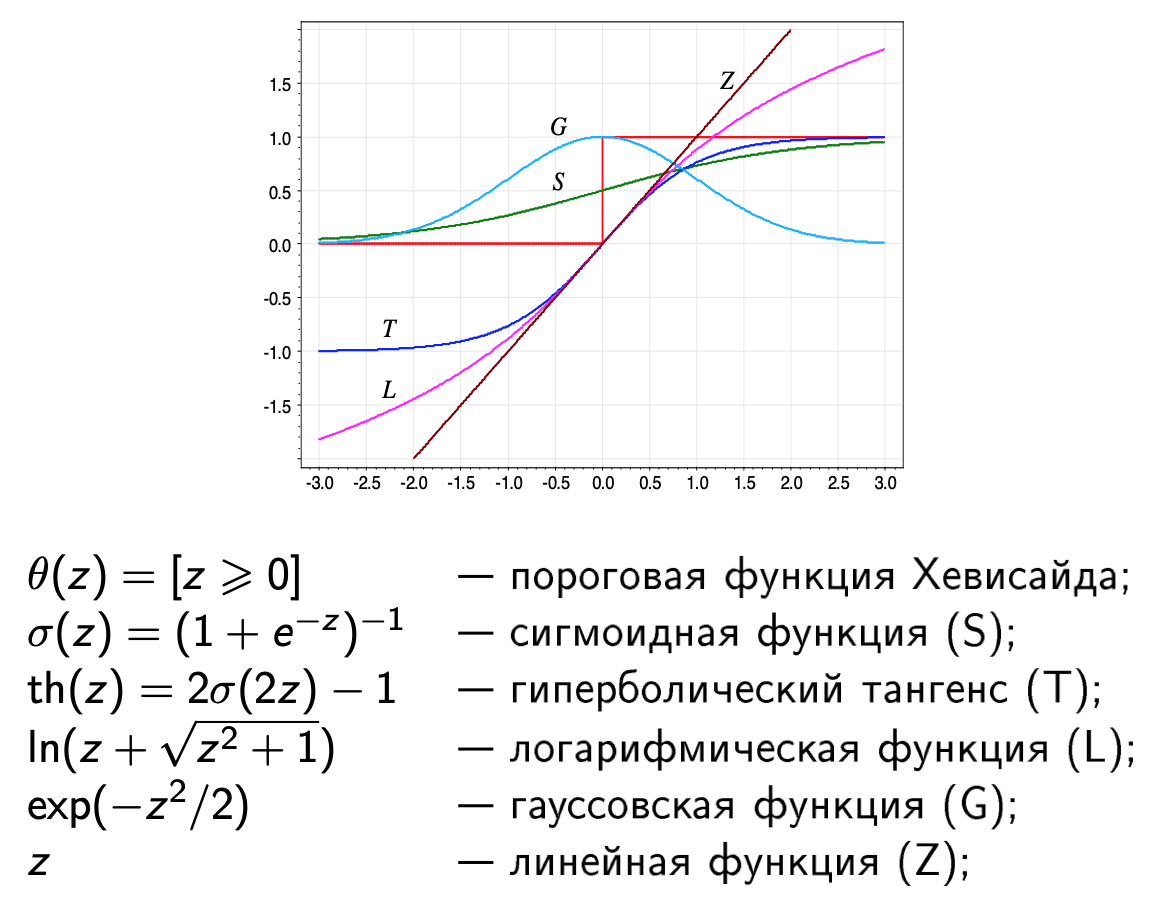

In [2]:
from IPython.display import Image
Image(filename='images/5.2 Нейронные сети/image_2.png')

## Линейные алгоритмы классификации и регрессии

Как же происходит обучение отдельного нейрона, а потом и всей сети нейронов? По-прежнему мы будем рассматривать оптимизационную постановку задачи. Для задач классификации мы уже рассматривали с вами функционал, основанный на аппроксимации пороговой функции потерь, а для задач регрессии, как правило, это метод наименьших квадратов, хотя в общем случае можно рассматривать какую-то функцию потерь произвольного вида, который является функцией от параметров нейрона $w$ и от объекта пары, объекта ответ $x_i, y_i$. 

Возникает вопрос — каковы же всё-таки возможности отдельного нейрона по аппроксимации функций, и каковы возможности нейронной сети? Действительно ли нам нужно такое огромное количество нейронов, чтобы научиться решать более содержательные задачи, чем линейные модели? Конечно же, узость линейной модели классификации связана с тем, что она может только построить разделяющую гиперплоскость в пространстве объектов, и, конечно же, не всякая выборка линейно разделима, поэтому линейный нейрон, он может далеко не всё, далеко не всякую задачу решить, и сложные задачи классификации, где сложные границы между классами, они не под силу линейным моделям.

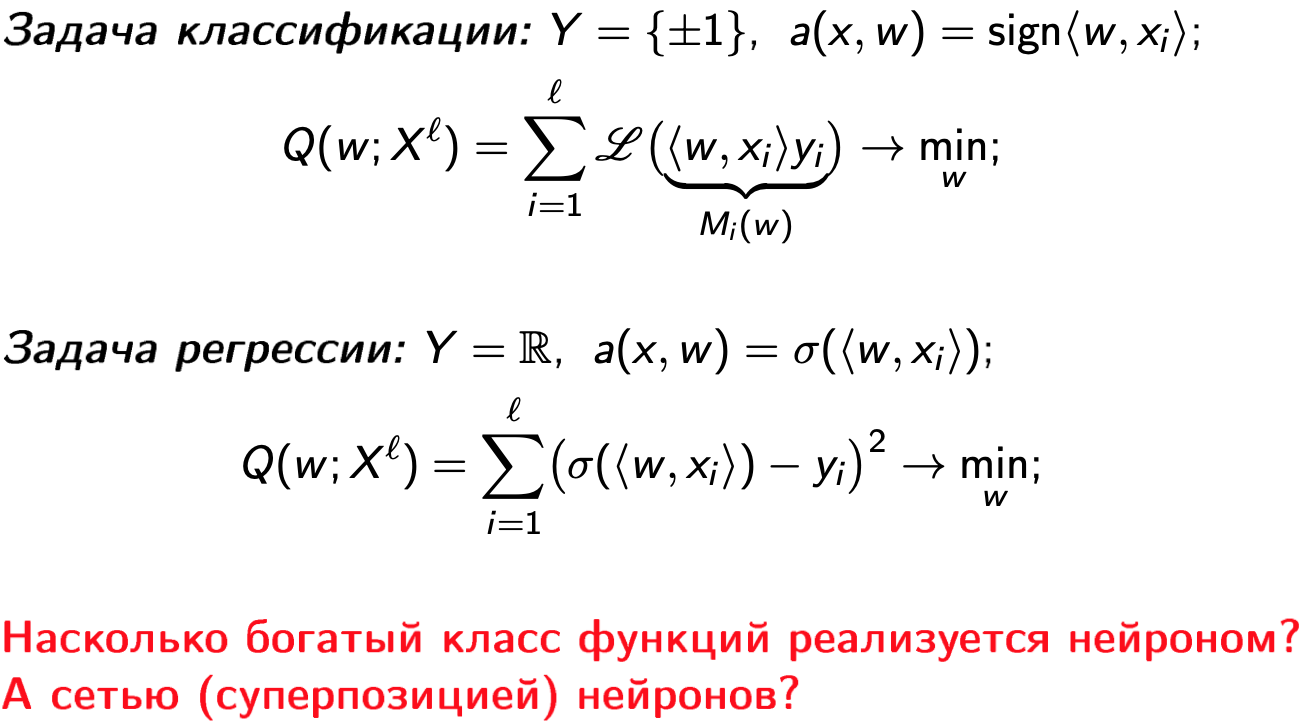

In [3]:
from IPython.display import Image
Image(filename='images/5.2 Нейронные сети/image_3.png')

## Нейронная реализация логических функций

Действительно ли обогащение линейной модели, вот возможность строить суперпозиции нейронов, действительно ли она приводит к повышению аппроксимационных возможностей? Любую ли функцию можно аппроксимировать с помощью нейронной сети? 

Ну вот первое объяснение в сторону ответа на этот вопрос для частного случая. Когда все признаки бинарны, и когда мы занимаемся бинарной классификацией, объяснение лежит в области функции алгебры логики. Дело в том, что мы знаем, что любую булеву функцию, то есть функция, которая переводит бинарные переменные в бинарный ответ, можно представить в виде суперпозиции операций «и», «или» и «не». Это известный факт представления булевых функций в виде дизъюнктивных нормальных форм. Но, оказывается, что по отдельности операции «и», «или» и «не» легко реализуются с помощью линейного классификатора с пороговым решающим правилом, то есть линейные модели нейрона.

Эта реализация представлена на слайде и в виде формулы очень простой и понятной, очевидной, и в виде вот такой вот схемы входы — выходы, и в виде картинки, как вот эти вот четыре точки, четыре возможных сочетаний значения бинарных переменных $x^1$ и $x^2$, как они классифицируются на два класса. Вот это совершенно понятно, как реализовать, и дальше из суперпозиций этих функций можно построить любую булеву функцию. Поэтому ответ положительный, более того, дизъюнктивная нормальная форма говорит нам, что мы строим дизъюнкцию, конъюнкцию. Это означает, что более двух уровней в этой сети нам и не нужно, то есть двухуровневая нейронная сеть из таких вот бинарных элементов, она позволяет реализовать любую булеву функцию. 

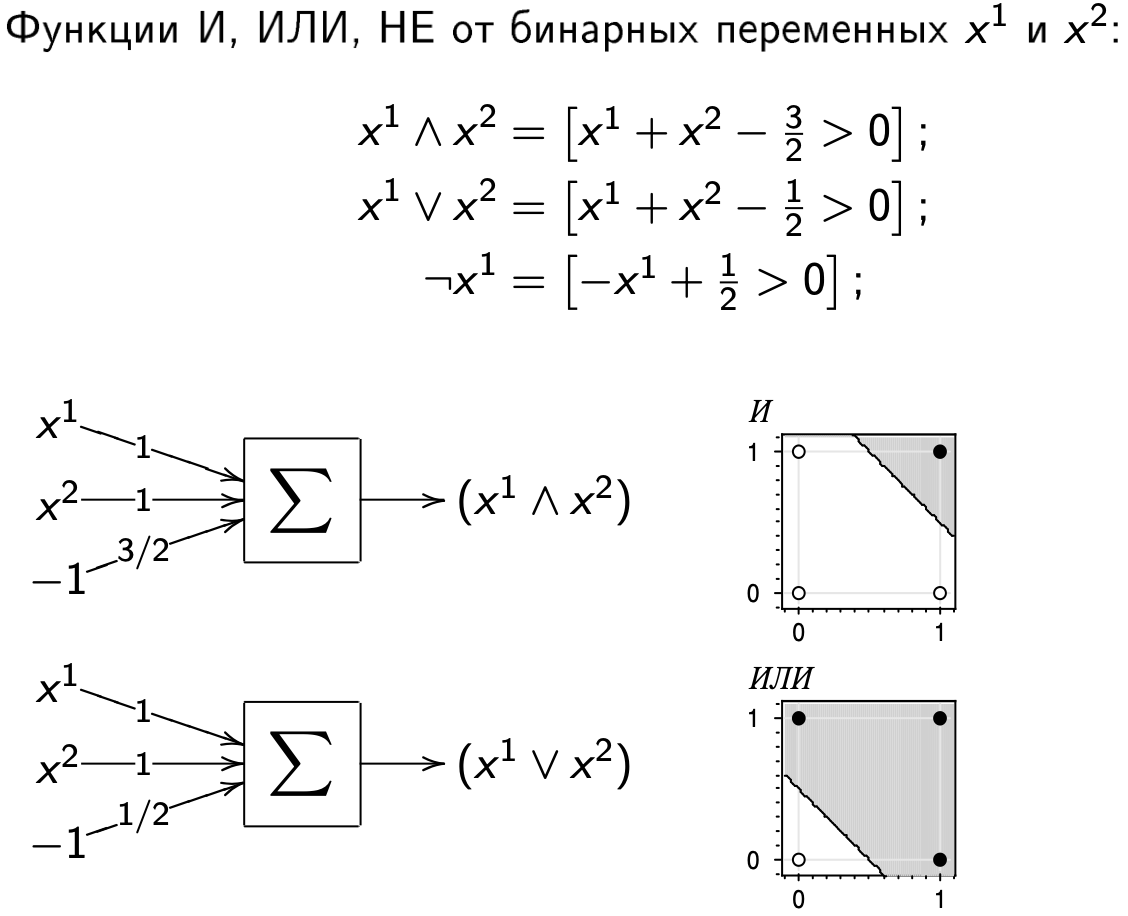

In [1]:
from IPython.display import Image
Image(filename='images/5.2 Нейронные сети/image_4.png')

## Логическая функция XOR (исключающее ИЛИ)

Ещё один классический пример, который очень поучителен. Во-первых, это пример простейшей выборки, которая не является линейно разделимой, так называемая выборка XOR или исключающего «ИЛИ». Видно на картинках, что как бы мы ни пытались построить один линейный классификатор, он не разделит белые и чёрные точки без ошибок. И видно также, что есть два пути, каким образом можно обобщать линейный классификатор, чтобы справиться с этой проблемой.

Первый путь — это добавление признаков, которые являются нелинейными комбинациями исходных признаков. Смотрите, как легко это реализовать. Мы добавляем произведение, признак новый, x1 * x2, получается три признака, x1, x2 и их произведение. И это нам позволяет разделить эту выборку без ошибок, то есть отсюда вывод — есть такой приём, и часто используется в машинном обучении, переход к расширенным пространствам большей размерностью путём добавления новых признаков. Это работает.

Второй, другой приём заключается в том, чтобы строить более сложное суперпозицию из простых элементов. Ну в данном случае в нашем распоряжении элементы И, ИЛИ, НЕ. Но их можно объединять в суперпозиции и над их выходами снова строить элементы И, ИЛИ, НЕ. Ну в данном случае показана двухслойная реализация той же самой функции XOR с использованием на первом слое элементов И и ИЛИ. Таким образом, мы видим, что суперпозиция — это действительно путь к тому, чтобы обобщить простой линейный классификатор и придать ему такую вот большую описательную возможность. Суперпозиции могут описывать гораздо более сложные функции, чем отдельный линейный нейрон. 

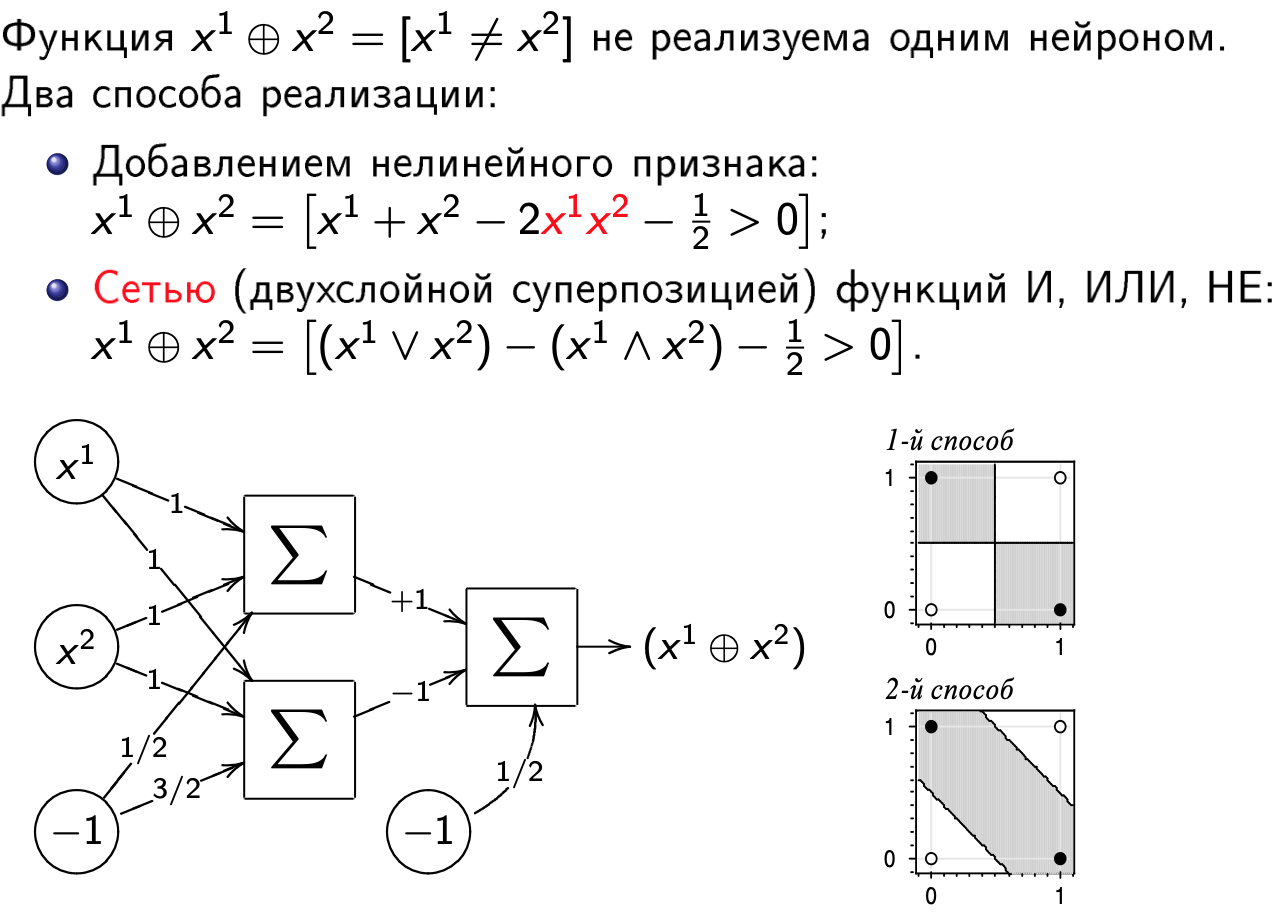

In [2]:
from IPython.display import Image
Image(filename='images/5.2 Нейронные сети/image_5.png')

## Любую ли функцию можно представить нейросетью?

Ну и, конечно же, исследователи много изучали этот вопрос: что могут нейронные сети? И здесь вкратце представлена такая вот сводка результатов, которые известны на сегодняшний день. 

Ну, во-первых, как было очень просто показать, что двухслойная сеть для бинарных данных позволяет реализовать произвольную булеву функцию, и эта реализация эквивалентна дизъюнктивным нормальным формам. Второй факт, что двухслойная сеть теперь уже в пространстве вещественнозначных функций позволяет отделить произвольный выпуклый многогранник. Ну это достаточно простой геометрический факт. Если вдуматься, что из себя представляет двухслойная сеть, то есть если первый слой — это отдельные гиперплоскости, то второй слой позволяет нам организовать произвольное множество, которое является пересечением полупространств. Ну, очевидно, это будет выпуклое множество, и вот это вот ограничение выпуклости не позволяет нам говорить, что мы можем аппроксимировать любую функцию с помощью двухслойной сети.

А вот трехслойная сеть уже позволяет отделить произвольную многогранную область, не обязательно выпуклую и даже не обязательно связную. Отсюда можно сделать вывод, что в принципе теоретически трехслойных сетей должно хватать для аппроксимации любых непрерывных функций решения сколь угодно сложных задач регрессии и классификации.

Ну вот еще один математический факт, который говорит о том, что суперпозиция линейных операций, то есть операций сложения, умножения на число и одной нелинейной функции активации, причем можно взять одну, фиксированную, и во всех нейронах использовать одну и ту же нелинейную функцию, вот этого достаточно, чтобы с любой заданной точностью приближать любую непрерывную функцию.

И если говорить о более практических рекомендациях, то, с одной стороны, да, двух-, трехслойных нейронных сетей часто хватает для того, чтобы решать и даже достаточно сложные задачи. Но все-таки остается сомнение, потому что природа нам подсказывает, что нервные системы устроены таким образом, что сигнал от рецепторов до исполнительных органов, например, от того, что мы глазом увидели опасность и одернули руку, вот этот сигнал у человека проходит порядка секунды. Можно даже посчитать, сколько слоев нервных клеток участвуют в обработке этого сигнала. Потому что реакцию отдельной нервной клетки на возбудитель мы примерно знаем. Ну и оказывается, что таких слоев где-то примерно от десятка до нескольких десятков.

И отсюда, конечно же, возникает желание научиться строить многослойные сети из большого числа слоев. Их сейчас стали называть глубокими сетями. Deep learning — глубокое обучение. И действительно, оказывается, что вот несмотря на то, что теоретически трех слоев достаточно, но если правильно, аккуратно строить сети из большого числа слоев, то очень сложные задачи они решают действительно очень хорошо.

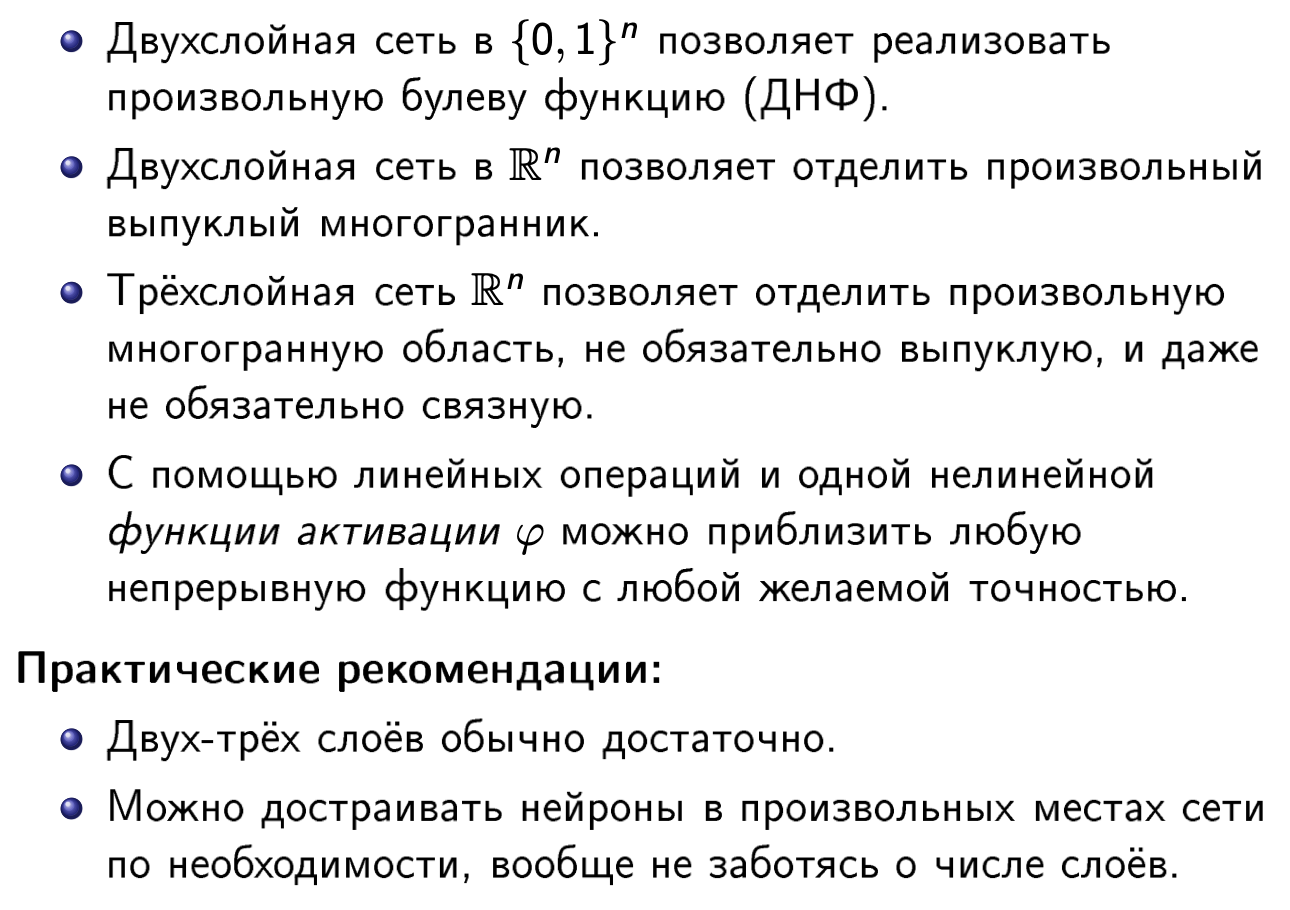

In [3]:
from IPython.display import Image
Image(filename='images/5.2 Нейронные сети/image_6.png')

Какие типы задач можно решать с помощью нейронных сетей?

- Задачи классификации и регрессии.